<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 2 Generate Descriptive Stats and Viz

- 1. boxplot for "MEDIAN VALUE OF OWNER OCCUPIED HOMES"
  2. bar plot for charles river variable
  3. box plot for MEDV vs AGE (discretize age into groups)
  4. scatter plot to show relationship between Nitric Oxide concentration and proportion of non-retail business acres
  5. histogram ofpupil to teacher ratio var
     

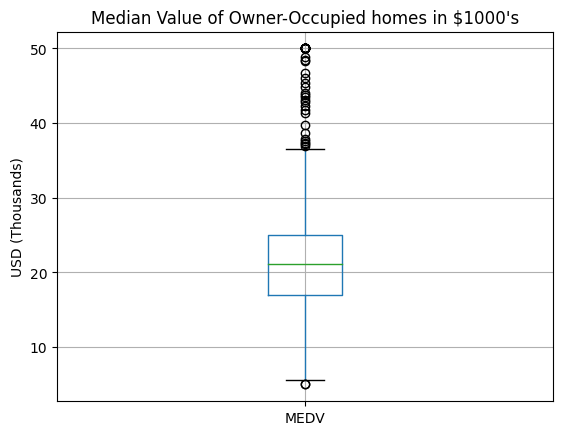

In [7]:
# 2.1 
import matplotlib.pyplot as plt

medv_boxplot = boston_df.boxplot(column="MEDV")
plt.title("Median Value of Owner-Occupied homes in $1000's")
plt.ylabel("USD (Thousands)")

plt.show()

## 2.1 explanation:
the distribution of MEDV in the boston dataset shows that the lower bound is just shy of \\$ 5k, the lower quartile is around \\$ 17k, and the median is just above \\$ 20k, upper quartile is about \\$ 25k and the upper bound is around \\$ 37k with many high outliers. This indicates that at high levels (more epensive) there is more variation in the dataset. 

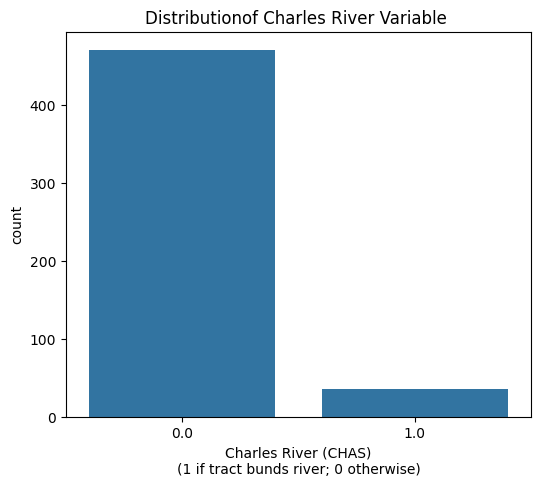

In [10]:
# 2.2 
import numpy as np

plt.figure(figsize = (6,5))
sns.countplot(data=boston_df, x='CHAS')
plt.xlabel("Charles River (CHAS)\n(1 if tract bunds river; 0 otherwise)")
plt.title("Distributionof Charles River Variable ")

plt.show()

## 2.2 Decsription
The barplot shows that there are far more instances of 0s than 1s. i.e. the bast majority of data points have tracts that do not bound the river. There are more than 450 instances of 0s and only about 50 instances of 1s. 

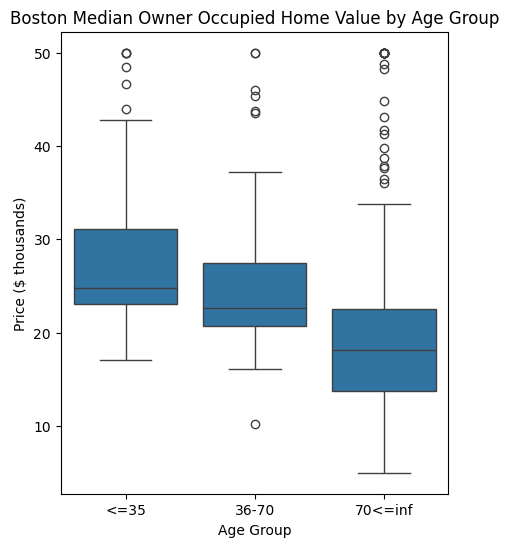

In [11]:
# 2.3 - boxplot MEDV vs AGE
# discretize

age_bins=[0,35,70,150]
boston_df['AGE_groups'] = pd.cut(boston_df['AGE'], bins=age_bins,labels=['<=35','36-70','70<=inf'])

plt.figure(figsize=(5,6))
sns.boxplot(x='AGE_groups', y='MEDV', data=boston_df)
plt.xlabel("Age Group")
plt.ylabel("Price ($ thousands)")
plt.title("Boston Median Owner Occupied Home Value by Age Group")
plt.show()
                                 

## 2.3 description:
the 35 and younger group has the highest median home value of the trhee age groups. Followed by 36-70, then 70 and up. The oldest group, though it has the lowest median value, has the highest variation with the lowest lower bound and the highest range of upper outliers. 

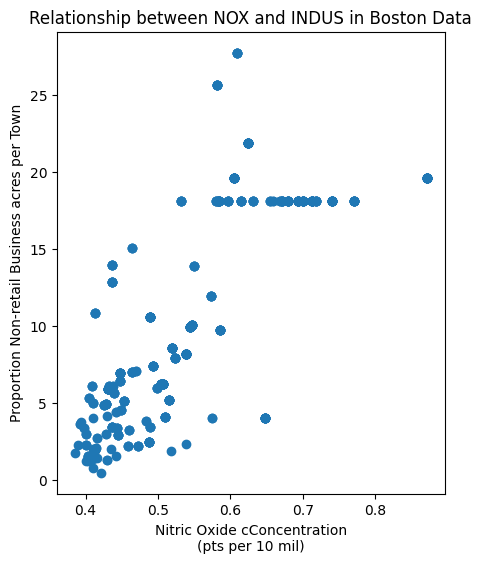

In [12]:
# 2.4 scatter plot NOX vs INDUS


plt.figure(figsize=(5,6))
plt.scatter(x='NOX', y='INDUS', data=boston_df)
plt.xlabel("Nitric Oxide cConcentration\n(pts per 10 mil)")
plt.ylabel("Proportion Non-retail Business acres per Town")
plt.title("Relationship between NOX and INDUS in Boston Data")
plt.show()
                


## 2.4 description:

the scatter plot shows that there is a clear positive relationship between NOX and INDUS. Thus as NOX concentration increases, so does the proportion of Non-retail acres per town. This indicates that areas of business (retail areas) are also areas that have less NOX.Likely the suburban or residential areas have the most NOX.


<Figure size 500x600 with 0 Axes>

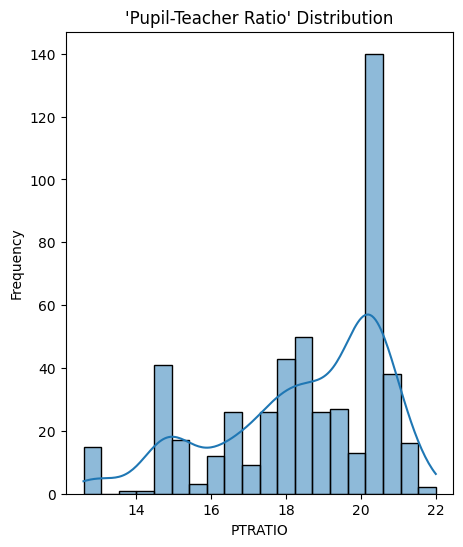

In [14]:
# 2.5 istogram of PTRATIO

plt.figure(figsize=(5,6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.title("'Pupil-Teacher Ratio' Distribution")
plt.show()

## 2.5 description

A high PTRATIO indicates that there are more students to teachers, i.e. bigger class sizes with less teacher supervision per child. Thismetric is uslally used as an indicator of education quality, with low PTRATIOs preferred. The histogram shows that shows that there are clearly more towns with high (bad) PTRATIOs. We can see this bc the distributionis left skewed. The most frequent ratio is ~20-21 students per one teacherat a freq of about 140 instances in the dataset. 

# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

- 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
  2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
  3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
  4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.



In [17]:
# 3.1 MEDV,CHAS
import scipy.stats as stats

charles_river= boston_df[boston_df['CHAS']==1]['MEDV']
not_charles_river= boston_df[boston_df['CHAS']==0]['MEDV']

t_stat, p_val = stats.ttest_ind(charles_river, not_charles_river)
print(f"T statistic: {t_stat}")
print(f"P value: {p_val}")
alpha=0.05

if p_val<alpha:
    print("significant difference")
else:
    print("no significant difference")


T statistic: 3.996437466090509
P value: 7.390623170519905e-05
significant difference


## 3.1 description

H0: There is no difference between CHAS and MEDV

H1: There is a difference between CHAS and MEDV

the ttest revealsthat there is a significant difference between median home values for properties that are on vs off teh charles river. The t-stat is quite high (\~4) indicating that the observed diff is high compares to the variability within groups. Also, the P-value (\~0.000074) is much lower than the alpha value of 0.05, menaing that thee is enough evidence to reject the null hypothesis.

In [25]:
# 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

import statsmodels.api as sm
group1 = boston_df[boston_df['AGE']<20]['MEDV']
group2 = boston_df[(boston_df['AGE']>=20)& (boston_df['AGE']<40)]['MEDV']
group3 = boston_df[boston_df['AGE']>=40]['MEDV']

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[-float('inf'),20,40,float('inf')],labels=['<20','20-40','40+'])
model= sm.OLS.from_formula('MEDV ~ C(AGE_group)',data=boston_df)
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     21.29
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.33e-09
Time:                        12:50:19   Log-Likelihood:                -1819.7
No. Observations:                 506   AIC:                             3645.
Df Residuals:                     503   BIC:                             3658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                27.41

## 3.2 description 

H0: There is no a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

H1:There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

The f statistic tests the null hypothesis (H0)... a High Fstat (as seen here) indicates that the difference btwn MEDV and AGE is significant. Thus, we have enough evidence to rejectthe H0.

In [26]:
# 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(correlation)
print(p_value)

0.7636514469209192
7.913361061210442e-98


## 3.3 description 

H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

H1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


The corr value of 0.75=6 indicates a positive relationship between the two variables. It is close to 1, indicating a fairly strong positive correlation. The P value is much lower than the significance threshold of 0.05, thus we can rejectthe null hypothesis that there is no relationshio between NOX and INDUS.


In [30]:
# 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

X = boston_df[['DIS']]
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)

model= sm.OLS(y_train, X_train_scaled)
result=model.fit()

print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     23.52
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.77e-06
Time:                        13:03:57   Log-Likelihood:                -1463.6
No. Observations:                 404   AIC:                             2931.
Df Residuals:                     402   BIC:                             2939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7965      0.452     50.453      0.0

## 3.4 Description 

H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

The coefficient represents the change in median home value or a one-unit increase in the weighted distance to employment centers. The coeff is high indicating a strong positive relationship. Also, the p-value (0.000) is less than alpha (0.05) meaning there is significant evidence to reject thenull hypothesis that there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes...